#Challengue 8

Se cambiaron los datos, con respecto a la parte1

In [8]:
#Librerias
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from google.colab import drive


#Introducción


Hay 368 imagenes de MR
Con 4 CDR
0: sin demencia
0.5: Baja demencia
1: Demencia moderada
2: Alta demencia

https://sites.wustl.edu/oasisbrains/



##Leer carpeta de imagenes en drive

In [9]:
from google.colab import drive
drive.mount('/content/drive')

#base='/content/drive/MyDrive/Colab Notebooks/Patrones/Challengue_N/data/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
#cambia='OAS1_0'+i+'MR1'+'/FSL_SEG/OAS1_'+i+'_MR1_mpr_n4_anon_111_t88_masked_gfc_fseg_tra_90.gif'

i= es de tre digitos

###Cargar base de datos para etiquetar

In [11]:
# Load the data
file_path = '/content/drive/MyDrive/Colab Notebooks/Patrones/Challengue_N/oasis1_cross_sectional.csv'
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Patrones/Challengue_N/oasis1_cross_sectional.csv')

In [12]:
# Map CDR values to their respective categories
#cdr_mapping = {0: 'no dementia', 0.5: 'very mild AD', 1: 'mild AD', 2: 'high AD'}
#df['CDR'] = df['CDR'].map(cdr_mapping)


tengo DESPROPORCIONADO LAS CLASES, PARA PODER USAR LAS 4 CATEGORIAS
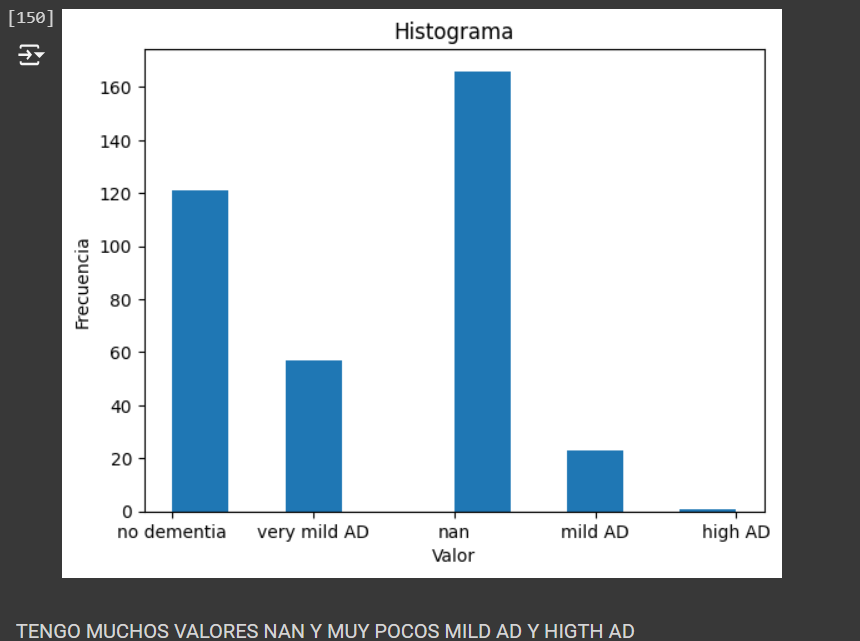

Por eso combino las clases y tengo con y sin demencia

In [13]:
# Remove rows with any NaN values
df = df.dropna(subset=['CDR'])
# Combine CDR classes
df['CDR'] = df['CDR'].apply(lambda x: 'no dementia' if x == 0 else 'with AD')

# Generate file paths
base_path = '/content/drive/MyDrive/Colab Notebooks/Patrones/Challengue_N/data'
df['file_path_n4'] = df['ID'].apply(lambda x: f"{base_path}/{x}/FSL_SEG/{x}_mpr_n4_anon_111_t88_masked_gfc_fseg_tra_90.gif")
df['file_path_n3'] = df['ID'].apply(lambda x: f"{base_path}/{x}/FSL_SEG/{x}_mpr_n3_anon_111_t88_masked_gfc_fseg_tra_90.gif")
df['file_path_n6'] = df['ID'].apply(lambda x: f"{base_path}/{x}/FSL_SEG/{x}_mpr_n6_anon_111_t88_masked_gfc_fseg_tra_90.gif")


<ipython-input-13-ff1564fc3390>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CDR'] = df['CDR'].apply(lambda x: 'no dementia' if x == 0 else 'with AD')
<ipython-input-13-ff1564fc3390>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['file_path_n4'] = df['ID'].apply(lambda x: f"{base_path}/{x}/FSL_SEG/{x}_mpr_n4_anon_111_t88_masked_gfc_fseg_tra_90.gif")
<ipython-input-13-ff1564fc3390>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

##Cargar imagen y clasificarlas

In [14]:
def load_images_from_dataframe(df, target_size=(256, 256)):
    images = []
    labels = []
    for idx, row in df.iterrows():
        img_path_n4 = row['file_path_n4']
        img_path_n3 = row['file_path_n3']
        img_path_n6 = row['file_path_n6']
        cdr_label = row['CDR']
        img_loaded = False
        try:
            # Try loading the image with n4 path
            img = tf.keras.preprocessing.image.load_img(img_path_n4, color_mode='grayscale', target_size=target_size)
            images.append(tf.keras.preprocessing.image.img_to_array(img))
            img_loaded = True
        except Exception:
            pass

        if not img_loaded:
            try:
                # Try loading the image with n3 path if n4 failed
                img = tf.keras.preprocessing.image.load_img(img_path_n3, color_mode='grayscale', target_size=target_size)
                images.append(tf.keras.preprocessing.image.img_to_array(img))
                img_loaded = True
            except Exception:
                pass

        if not img_loaded:
            try:
                # Try loading the image with n6 path if n3 and n4 failed
                img = tf.keras.preprocessing.image.load_img(img_path_n6, color_mode='grayscale', target_size=target_size)
                images.append(tf.keras.preprocessing.image.img_to_array(img))
                img_loaded = True
            except Exception:
                print(f"Error loading image with n4, n3, and n6 paths: {img_path_n4}, {img_path_n3}, {img_path_n6}")

        if img_loaded:
            labels.append(cdr_label)
    return np.array(images), np.array(labels)


# Load images
images, labels = load_images_from_dataframe(df)


Error loading image with n4, n3, and n6 paths: /content/drive/MyDrive/Colab Notebooks/Patrones/Challengue_N/data/OAS1_0274_MR1/FSL_SEG/OAS1_0274_MR1_mpr_n4_anon_111_t88_masked_gfc_fseg_tra_90.gif, /content/drive/MyDrive/Colab Notebooks/Patrones/Challengue_N/data/OAS1_0274_MR1/FSL_SEG/OAS1_0274_MR1_mpr_n3_anon_111_t88_masked_gfc_fseg_tra_90.gif, /content/drive/MyDrive/Colab Notebooks/Patrones/Challengue_N/data/OAS1_0274_MR1/FSL_SEG/OAS1_0274_MR1_mpr_n6_anon_111_t88_masked_gfc_fseg_tra_90.gif
Error loading image with n4, n3, and n6 paths: /content/drive/MyDrive/Colab Notebooks/Patrones/Challengue_N/data/OAS1_0278_MR1/FSL_SEG/OAS1_0278_MR1_mpr_n4_anon_111_t88_masked_gfc_fseg_tra_90.gif, /content/drive/MyDrive/Colab Notebooks/Patrones/Challengue_N/data/OAS1_0278_MR1/FSL_SEG/OAS1_0278_MR1_mpr_n3_anon_111_t88_masked_gfc_fseg_tra_90.gif, /content/drive/MyDrive/Colab Notebooks/Patrones/Challengue_N/data/OAS1_0278_MR1/FSL_SEG/OAS1_0278_MR1_mpr_n6_anon_111_t88_masked_gfc_fseg_tra_90.gif
Error lo

### Normalizar

In [15]:

print(f"Loaded {len(images)} images.")

Loaded 202 images.


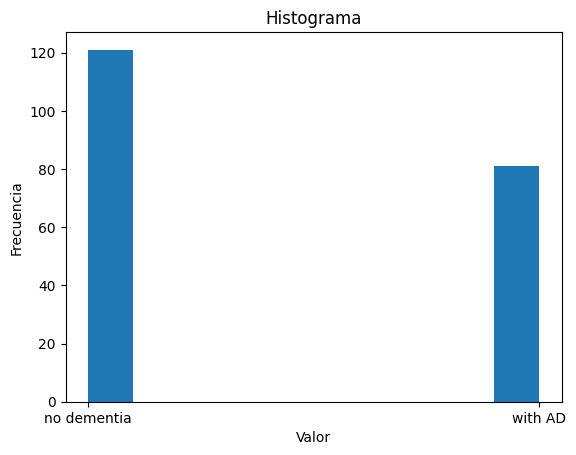

In [16]:

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.hist(labels, bins=10)  # Puedes ajustar el número de clases (bins) según tus necesidades
plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.title("Histograma")
plt.show()

TENGO MUCHOS VALORES NAN Y MUY POCOS MILD AD Y HIGTH AD

In [17]:
images = images / np.max(images)

In [18]:
# Encode labels
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

# Ensure the images are in the correct shape (batch_size, height, width, channels)
images = np.expand_dims(images, axis=-1)


##Inicializar modelo

In [19]:
# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=41)

# Build the initial neural network model with multiple hidden layers
initial_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(256, 256, 1)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

# Compile the model
initial_model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])


In [20]:
#Entrenar
initial_history = initial_model.fit(X_train, y_train, epochs=15, validation_data=(X_val, y_val))


Epoch 1/15
6/6 [==============================] - 12s 2s/step - loss: 9.0160 - accuracy: 0.5963 - val_loss: 17.2682 - val_accuracy: 0.5610
Epoch 2/15
6/6 [==============================] - 4s 589ms/step - loss: 15.9078 - accuracy: 0.5901 - val_loss: 8.6350 - val_accuracy: 0.5610
Epoch 3/15
6/6 [==============================] - 3s 578ms/step - loss: 9.8958 - accuracy: 0.6149 - val_loss: 27.0100 - val_accuracy: 0.4390
Epoch 4/15
6/6 [==============================] - 5s 815ms/step - loss: 19.8056 - accuracy: 0.4348 - val_loss: 10.4716 - val_accuracy: 0.5610
Epoch 5/15
6/6 [==============================] - 4s 703ms/step - loss: 5.9130 - accuracy: 0.5776 - val_loss: 5.3335 - val_accuracy: 0.5610
Epoch 6/15
6/6 [==============================] - 4s 599ms/step - loss: 3.7326 - accuracy: 0.5839 - val_loss: 7.0258 - val_accuracy: 0.5610
Epoch 7/15
6/6 [==============================] - 3s 584ms/step - loss: 6.3178 - accuracy: 0.5404 - val_loss: 0.7894 - val_accuracy: 0.6098
Epoch 8/15
6/6 [=

##Evaluar modelo

2/2 [==============================] - 0s 63ms/step - loss: 0.8108 - accuracy: 0.5366

Initial Test accuracy: 0.5365853905677795

Initial Test loss: 0.8108426332473755


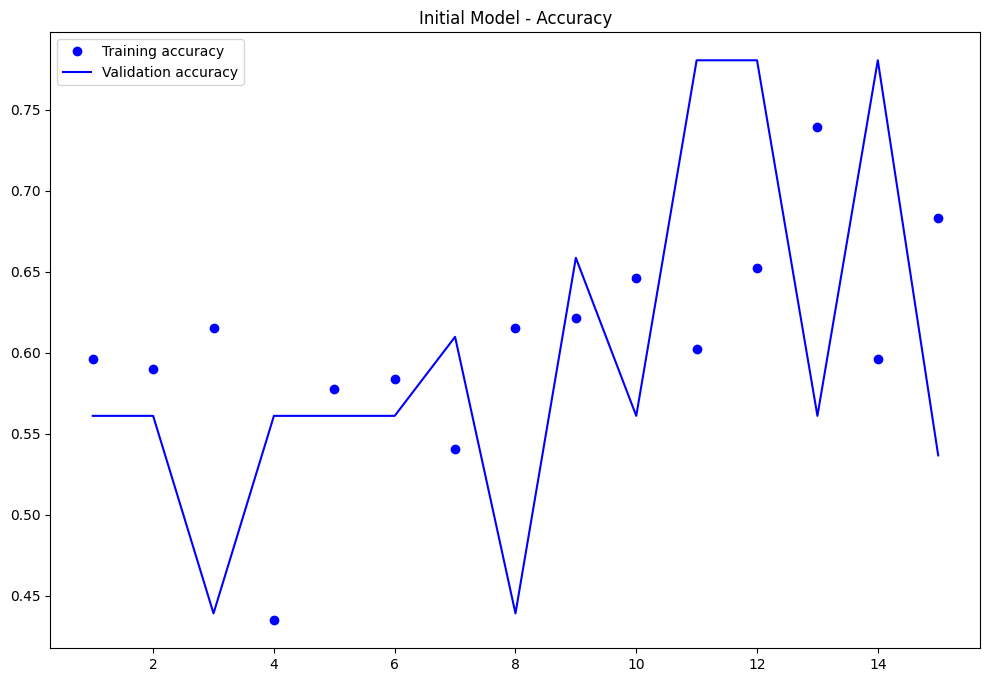

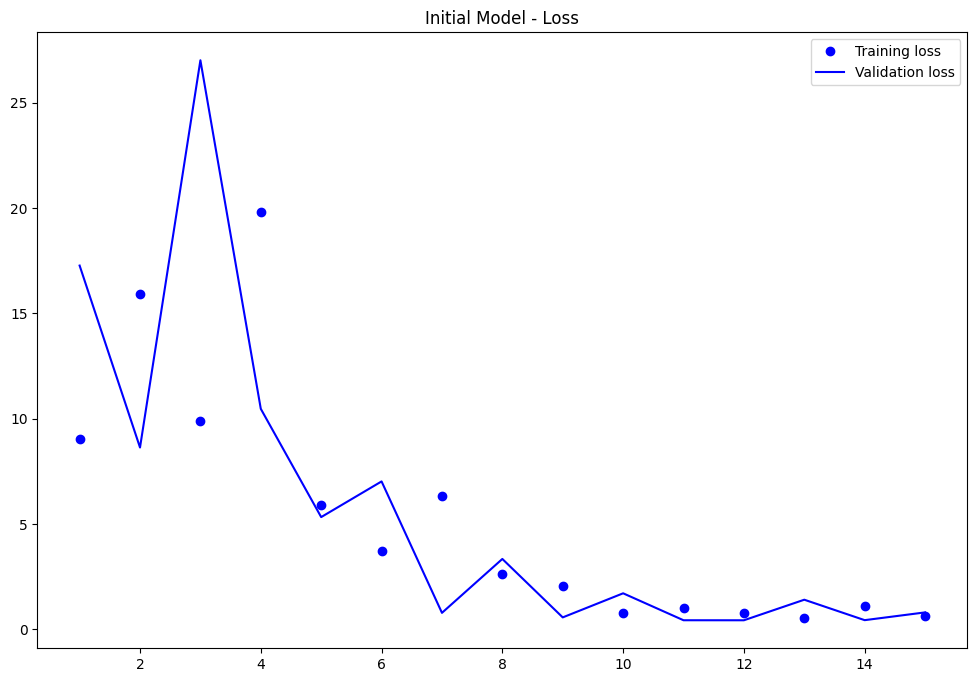

In [21]:
initial_test_loss, initial_test_acc = initial_model.evaluate(X_val, y_val)
print('\nInitial Test accuracy:', initial_test_acc)
print('\nInitial Test loss:', initial_test_loss)
import matplotlib.pyplot as plt
# Plot training and validation accuracy/loss
def plot_history(history, title):
    history_dict = history.history
    acc = history_dict['accuracy']
    val_acc = history_dict['val_accuracy']
    loss = history_dict['loss']
    val_loss = history_dict['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 8))
    plt.plot(epochs, acc, 'bo', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title(title + ' - Accuracy')
    plt.legend()
    plt.figure(figsize=(12, 8))
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title(title + ' - Loss')
    plt.legend()
    plt.show()

plot_history(initial_history, "Initial Model")

# Model with reduced layers, regularization, and dropout to handle overfitting
def build_and_train_model(layer_sizes, regularization, dropout_rate, epochs=15):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape=(256, 256, 1)))

    for size in layer_sizes:
        model.add(tf.keras.layers.Dense(size, activation='relu', kernel_regularizer=regularization))
        if dropout_rate > 0:
            model.add(tf.keras.layers.Dropout(dropout_rate))

    model.add(tf.keras.layers.Dense(2, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_val, y_val))

    test_loss, test_acc = model.evaluate(X_val, y_val)
    print(f'\nTest accuracy: {test_acc}')
    print(f'\nTest loss: {test_loss}')

    plot_history(history, f"Model with {len(layer_sizes)} layers, Reg: {regularization}, Dropout: {dropout_rate}")
    return model


lA linea de tendencia no es clara

#Reduciendo capas

Epoch 1/15
6/6 [==============================] - 3s 201ms/step - loss: 6.8871 - accuracy: 0.5280 - val_loss: 2.1351 - val_accuracy: 0.5610
Epoch 2/15
6/6 [==============================] - 0s 72ms/step - loss: 4.1575 - accuracy: 0.5901 - val_loss: 1.5821 - val_accuracy: 0.7073
Epoch 3/15
6/6 [==============================] - 0s 78ms/step - loss: 3.5258 - accuracy: 0.5590 - val_loss: 1.6893 - val_accuracy: 0.4390
Epoch 4/15
6/6 [==============================] - 0s 70ms/step - loss: 2.9908 - accuracy: 0.5466 - val_loss: 2.1406 - val_accuracy: 0.4390
Epoch 5/15
6/6 [==============================] - 0s 84ms/step - loss: 2.6187 - accuracy: 0.5404 - val_loss: 1.6069 - val_accuracy: 0.5854
Epoch 6/15
6/6 [==============================] - 0s 79ms/step - loss: 2.9593 - accuracy: 0.4845 - val_loss: 1.5460 - val_accuracy: 0.4390
Epoch 7/15
6/6 [==============================] - 0s 79ms/step - loss: 2.1878 - accuracy: 0.5155 - val_loss: 1.6070 - val_accuracy: 0.5610
Epoch 8/15
6/6 [==========

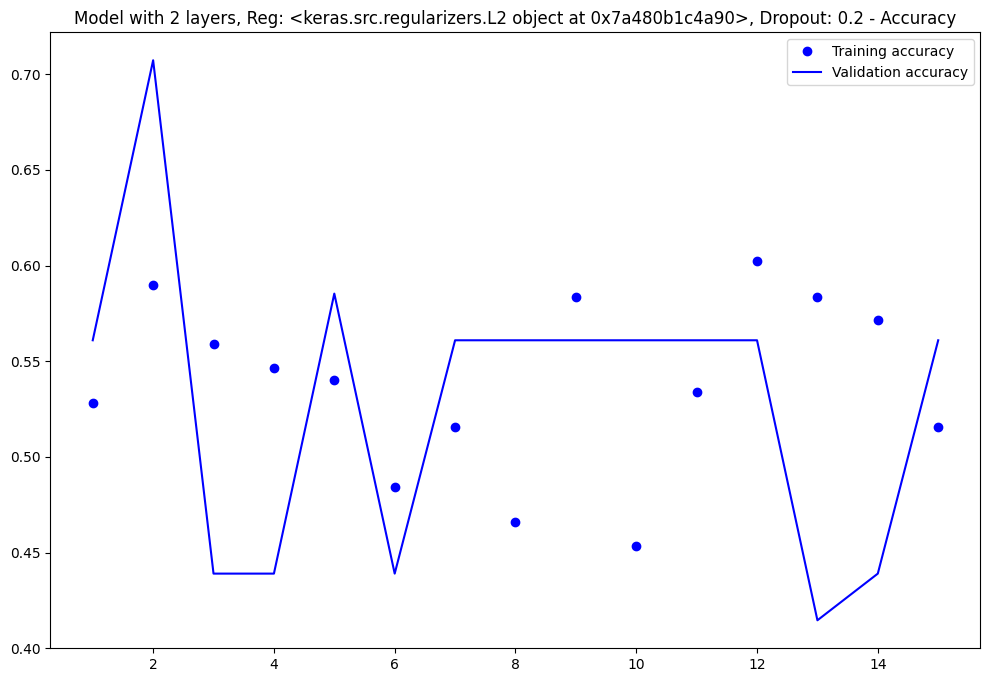

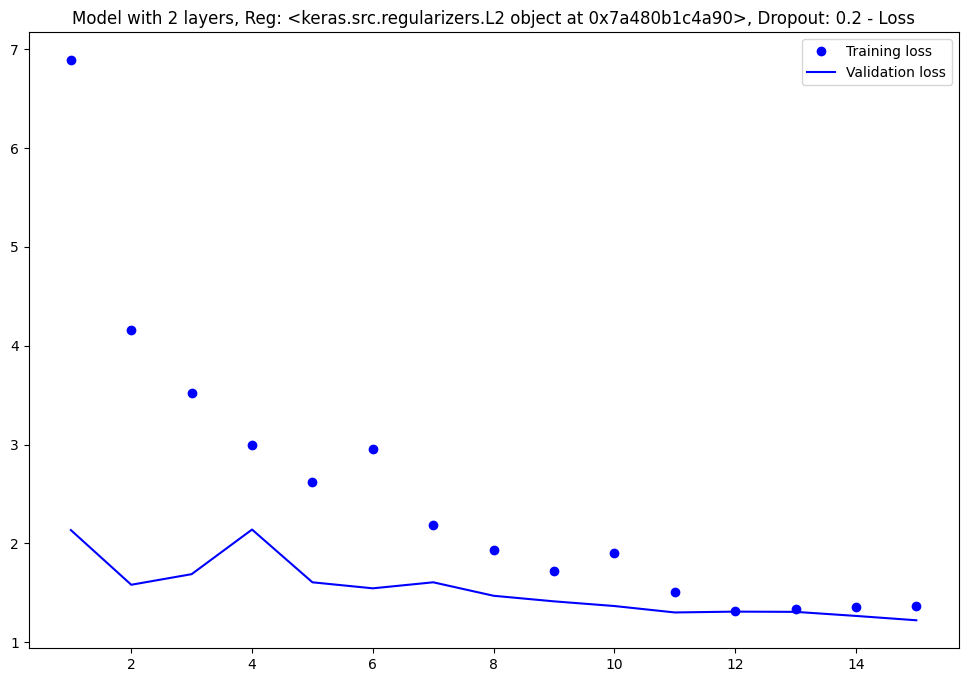

In [22]:
# Reduced layers and regularization
layer_sizes = [64, 32]
regularization = tf.keras.regularizers.l2(0.01)
dropout_rate = 0.2
build_and_train_model(layer_sizes, regularization, dropout_rate)


Epoch 1/15
6/6 [==============================] - 1s 116ms/step - loss: 10.7424 - accuracy: 0.4658 - val_loss: 6.0006 - val_accuracy: 0.5610
Epoch 2/15
6/6 [==============================] - 0s 75ms/step - loss: 8.8030 - accuracy: 0.4845 - val_loss: 3.7473 - val_accuracy: 0.4390
Epoch 3/15
6/6 [==============================] - 0s 78ms/step - loss: 8.4329 - accuracy: 0.4969 - val_loss: 1.7380 - val_accuracy: 0.6098
Epoch 4/15
6/6 [==============================] - 0s 76ms/step - loss: 2.6840 - accuracy: 0.5031 - val_loss: 1.8608 - val_accuracy: 0.5610
Epoch 5/15
6/6 [==============================] - 0s 73ms/step - loss: 1.8663 - accuracy: 0.5963 - val_loss: 1.8632 - val_accuracy: 0.5610
Epoch 6/15
6/6 [==============================] - 0s 73ms/step - loss: 1.8566 - accuracy: 0.5901 - val_loss: 1.8387 - val_accuracy: 0.5610
Epoch 7/15
6/6 [==============================] - 1s 118ms/step - loss: 1.8239 - accuracy: 0.6087 - val_loss: 1.8013 - val_accuracy: 0.5610
Epoch 8/15
6/6 [========

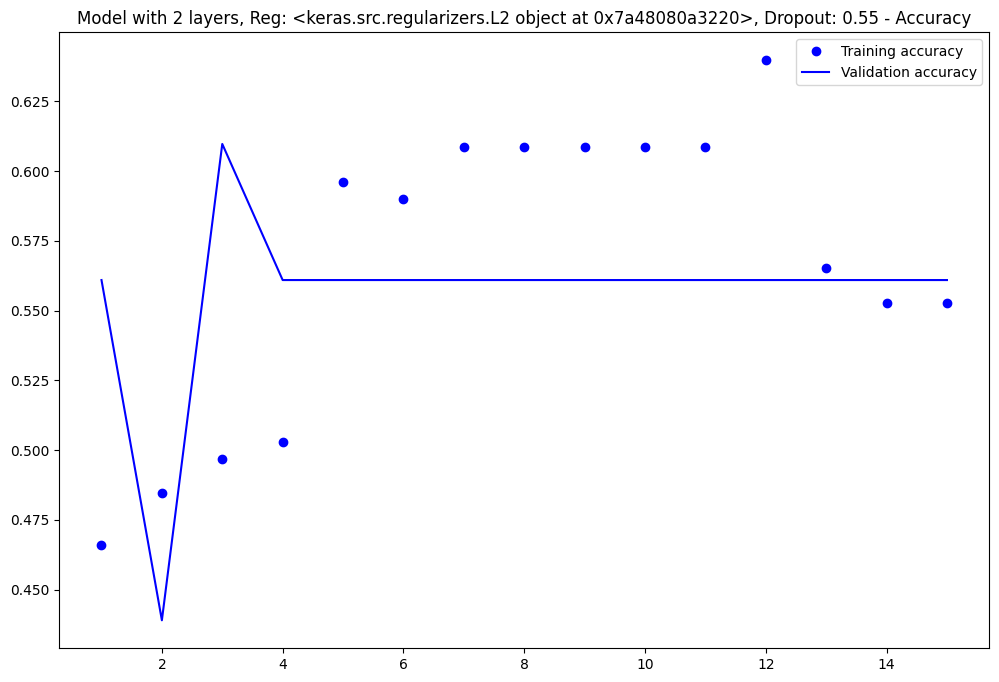

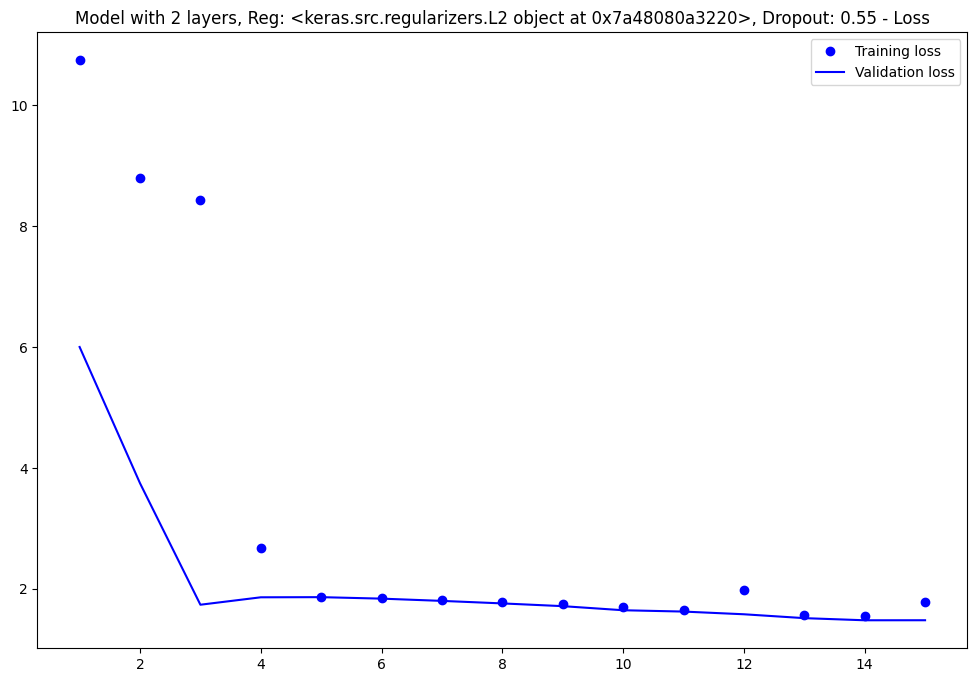

In [23]:
# Reduced layers, regularization, and dropout
layer_sizes = [64, 32]
regularization = tf.keras.regularizers.l2(0.01)
dropout_rate = 0.55
build_and_train_model(layer_sizes, regularization, dropout_rate)

Epoch 1/15
6/6 [==============================] - 5s 718ms/step - loss: 26.8456 - accuracy: 0.4969 - val_loss: 14.3325 - val_accuracy: 0.5610
Epoch 2/15
6/6 [==============================] - 5s 777ms/step - loss: 44.0693 - accuracy: 0.5093 - val_loss: 1.8889 - val_accuracy: 0.4390
Epoch 3/15
6/6 [==============================] - 5s 889ms/step - loss: 42.3036 - accuracy: 0.5155 - val_loss: 10.0266 - val_accuracy: 0.5610
Epoch 4/15
6/6 [==============================] - 4s 682ms/step - loss: 36.0485 - accuracy: 0.5590 - val_loss: 12.2975 - val_accuracy: 0.5610
Epoch 5/15
6/6 [==============================] - 4s 683ms/step - loss: 47.3572 - accuracy: 0.5093 - val_loss: 6.6597 - val_accuracy: 0.5610
Epoch 6/15
6/6 [==============================] - 6s 1s/step - loss: 36.1952 - accuracy: 0.4783 - val_loss: 1.8131 - val_accuracy: 0.5610
Epoch 7/15
6/6 [==============================] - 4s 677ms/step - loss: 38.9514 - accuracy: 0.4907 - val_loss: 1.7973 - val_accuracy: 0.4390
Epoch 8/15
6/

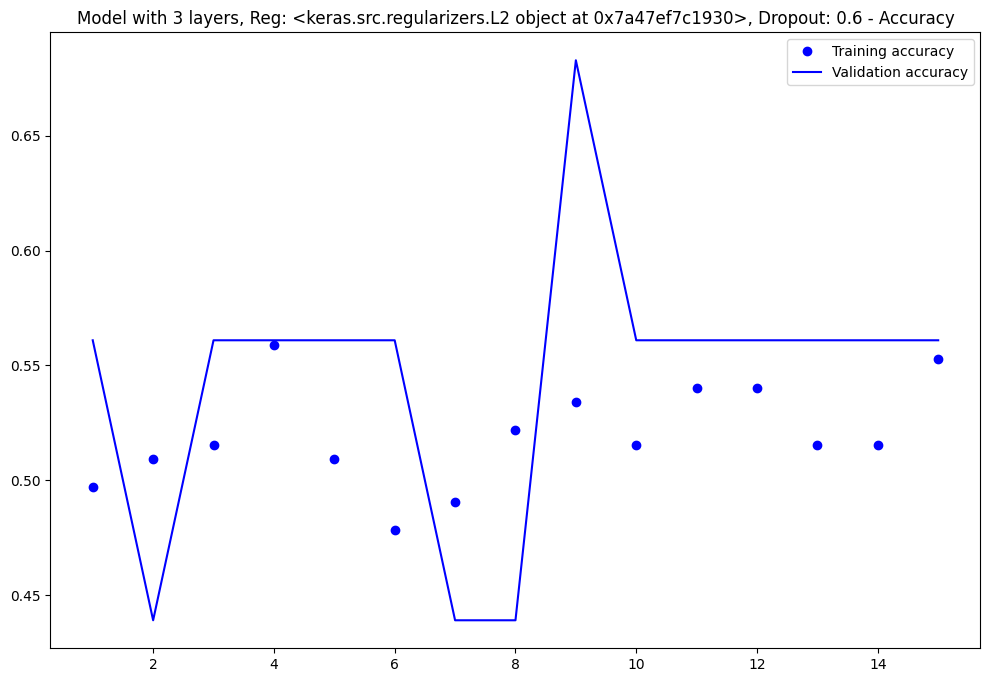

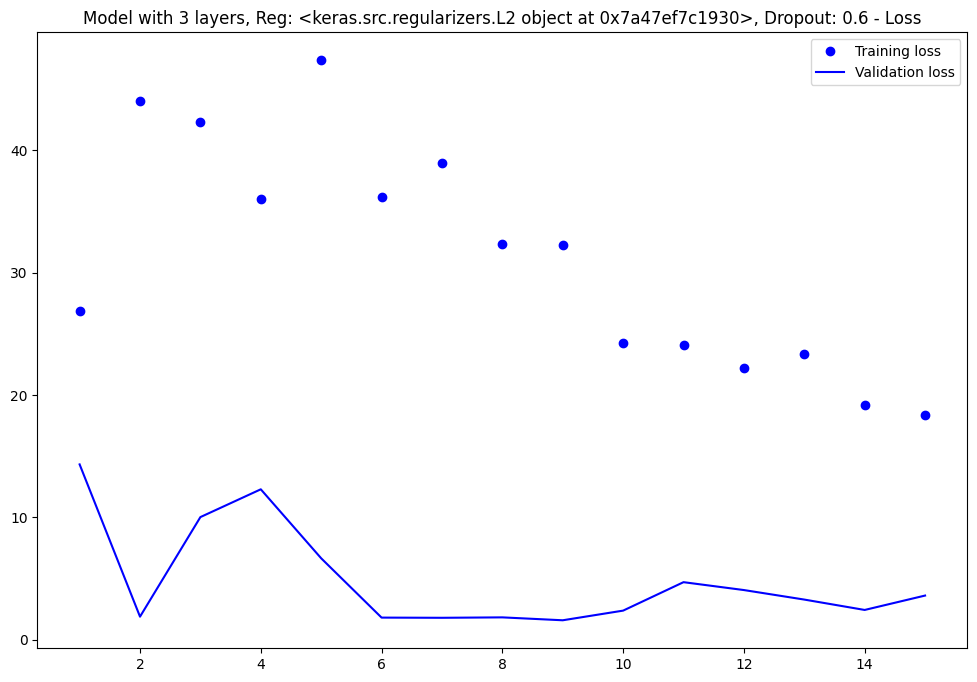

In [24]:
# Original number of layers with regularization and dropout
layer_sizes = [512, 256, 128]
regularization = tf.keras.regularizers.l2(0.001)
dropout_rate = 0.6
build_and_train_model(layer_sizes, regularization, dropout_rate)

Como se puede apreciar el modelo de dos capas tiene la mejor tendencia y sentido de función de los datos.
Mientras más simple el modelo tiene mejores resultados
Accuracy de 42%

#Redes Neuronales Comvulocionales


Construir el modelo de red neuronal convolucional

In [25]:
model = tf.keras.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 1), kernel_regularizer=l2(0.001)),
    MaxPooling2D((2, 2)),
    Dropout(0.5),
    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    MaxPooling2D((2, 2)),
    Dropout(0.5),
    Flatten(),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(2, activation='softmax')
])
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


###Entrenar el modelo

In [26]:
history = model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_val, y_val))

Epoch 1/20
11/11 [==============================] - 22s 2s/step - loss: 3.5922 - accuracy: 0.5404 - val_loss: 0.8943 - val_accuracy: 0.5610
Epoch 2/20
11/11 [==============================] - 18s 2s/step - loss: 1.0128 - accuracy: 0.5776 - val_loss: 0.9429 - val_accuracy: 0.4390
Epoch 3/20
11/11 [==============================] - 19s 2s/step - loss: 0.9416 - accuracy: 0.5280 - val_loss: 0.9342 - val_accuracy: 0.5610
Epoch 4/20
11/11 [==============================] - 22s 2s/step - loss: 0.9050 - accuracy: 0.6087 - val_loss: 0.9160 - val_accuracy: 0.5610
Epoch 5/20
11/11 [==============================] - 19s 2s/step - loss: 0.8827 - accuracy: 0.6087 - val_loss: 0.8970 - val_accuracy: 0.5610
Epoch 6/20
11/11 [==============================] - 21s 2s/step - loss: 0.8656 - accuracy: 0.6087 - val_loss: 0.8774 - val_accuracy: 0.5610
Epoch 7/20
11/11 [==============================] - 22s 2s/step - loss: 0.8312 - accuracy: 0.6087 - val_loss: 0.8535 - val_accuracy: 0.5610
Epoch 8/20
11/11 [==

##Evaluar Modelo

2/2 [==============================] - 1s 217ms/step - loss: 0.6726 - accuracy: 0.6098

Test accuracy: 0.6097561120986938

Test loss: 0.67263263463974


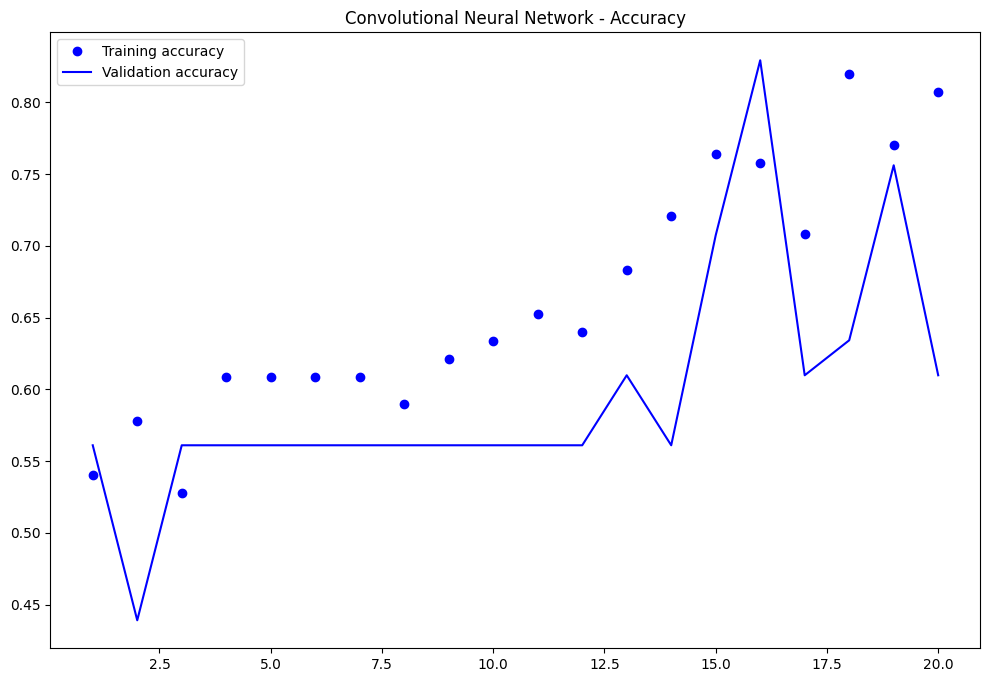

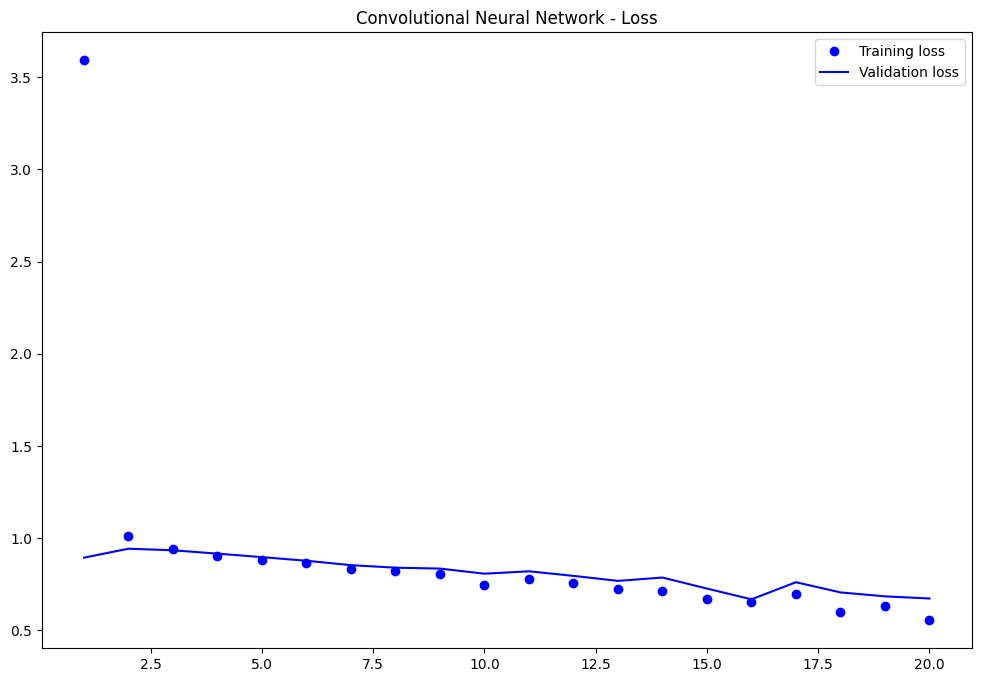

In [27]:
test_loss, test_acc = model.evaluate(X_val, y_val)
print(f'\nTest accuracy: {test_acc}')
print(f'\nTest loss: {test_loss}')

# Plot training and validation accuracy/loss
history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 8))
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Convolutional Neural Network - Accuracy')
plt.legend()
plt.figure(figsize=(12, 8))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Convolutional Neural Network - Loss')
plt.legend()
plt.show()


EL ACCURACY MEJORA CONSIDERABLEMENTE
loss: 0.6333 - accuracy: 0.7826 - val_loss: 0.6681 - val_accuracy: 0.8293
A 78%

##Usando keras-tuner

In [28]:
!pip install -q -U keras-tuner
import kerastuner as kt


In [29]:
def build_model(hp):
    model = tf.keras.Sequential()
    model.add(Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values=[3,5]),
        activation='relu',
        input_shape=(256, 256, 1)
    ))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(hp.Float('dropout_1', min_value=0.2, max_value=0.5, step=0.1)))

    model.add(Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values=[3,5]),
        activation='relu'
    ))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(hp.Float('dropout_2', min_value=0.2, max_value=0.5, step=0.1)))

    model.add(Flatten())
    model.add(Dense(
        units=hp.Int('dense_units', min_value=32, max_value=256, step=32),
        activation='relu'
    ))
    model.add(Dense(2, activation='softmax'))

    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model


##Inicializar el tuner y realizar la búsqueda de hiperparámetros:

In [30]:
from tensorflow import keras
tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=20,
    factor=3,
    directory='keras_tuner_dir',
    project_name='cnn_tuning'
)

stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

tuner.search(X_train, y_train, epochs=50, validation_data=(X_val, y_val), callbacks=[stop_early])


Trial 10 Complete [00h 02m 24s]
val_accuracy: 0.5609756112098694

Best val_accuracy So Far: 0.5609756112098694
Total elapsed time: 00h 50m 30s

Search: Running Trial #11

Value             |Best Value So Far |Hyperparameter
96                |96                |conv_1_filter
3                 |3                 |conv_1_kernel
0.4               |0.2               |dropout_1
32                |112               |conv_2_filter
5                 |3                 |conv_2_kernel
0.3               |0.4               |dropout_2
256               |32                |dense_units
0.0001            |0.001             |learning_rate
3                 |3                 |tuner/epochs
0                 |0                 |tuner/initial_epoch
2                 |2                 |tuner/bracket
0                 |0                 |tuner/round

Epoch 1/3
2/6 [=========>....................] - ETA: 40s - loss: 1.3897 - accuracy: 0.5781 

KeyboardInterrupt: 

##Obtener los mejores hiperparámetros y entrenar el modelo final:

In [31]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

model = build_model(best_hps)
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

test_loss, test_acc = model.evaluate(X_val, y_val)
print(f'\nTest accuracy: {test_acc}')
print(f'\nTest loss: {test_loss}')


Epoch 1/20
6/6 [==============================] - 74s 12s/step - loss: 5.4320 - accuracy: 0.5590 - val_loss: 0.6932 - val_accuracy: 0.4390
Epoch 2/20
6/6 [==============================] - 55s 9s/step - loss: 0.6933 - accuracy: 0.3913 - val_loss: 0.6932 - val_accuracy: 0.4390
Epoch 3/20
6/6 [==============================] - 55s 9s/step - loss: 0.6931 - accuracy: 0.5031 - val_loss: 0.6930 - val_accuracy: 0.5610
Epoch 4/20
6/6 [==============================] - 58s 9s/step - loss: 0.6926 - accuracy: 0.6087 - val_loss: 0.6926 - val_accuracy: 0.5610
Epoch 5/20
6/6 [==============================] - 53s 9s/step - loss: 0.6921 - accuracy: 0.6087 - val_loss: 0.6924 - val_accuracy: 0.5610
Epoch 6/20
6/6 [==============================] - 55s 9s/step - loss: 0.6918 - accuracy: 0.6087 - val_loss: 0.6923 - val_accuracy: 0.5610
Epoch 7/20
6/6 [==============================] - 53s 9s/step - loss: 0.6917 - accuracy: 0.6087 - val_loss: 0.6922 - val_accuracy: 0.5610
Epoch 8/20
6/6 [=================

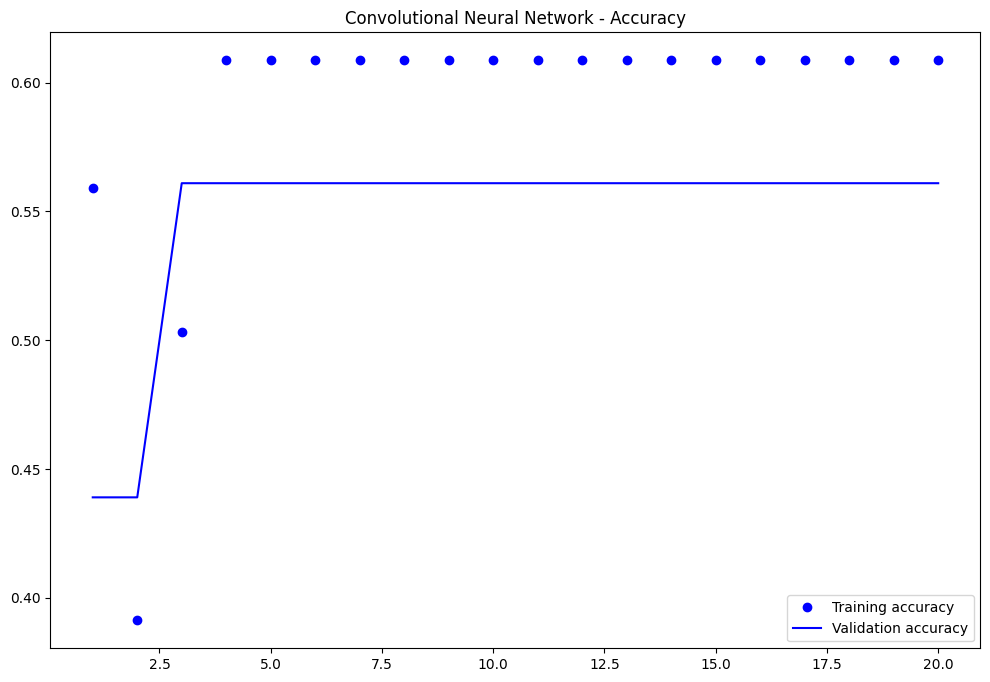

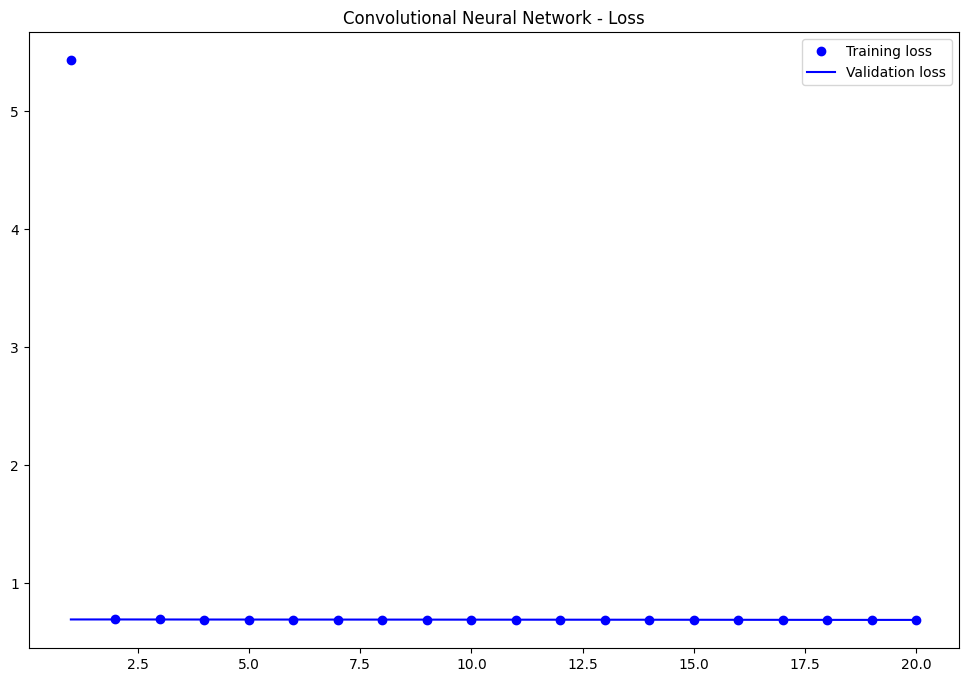

In [32]:
# Plot training and validation accuracy/loss
history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 8))
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Convolutional Neural Network - Accuracy')
plt.legend()
plt.figure(figsize=(12, 8))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Convolutional Neural Network - Loss')
plt.legend()
plt.show()

Test accuracy: 0.5609756112098694

Test loss: 0.6894294619560242
No es tan bueno la modificación de hiperparametros, no cambia mucho